# Stock Price Predict


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Predictions</a>

<a href=#seven>7. Model Performance</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [2]:
import yfinance as yf

In [3]:
yf

<module 'yfinance' from 'C:\\Users\\molat\\anaconda3\\Lib\\site-packages\\yfinance\\__init__.py'>

In [4]:
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)

In [5]:
stock = "GOOG"
g_df = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

##### Data Checks to perform

- Check Missing values
- Check data type
- Check statistics of data set

In [6]:
g_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [7]:
g_df.shape

(4957, 6)

In [8]:
g_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4957 entries, 2004-08-19 to 2024-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4957 non-null   float64
 1   High       4957 non-null   float64
 2   Low        4957 non-null   float64
 3   Close      4957 non-null   float64
 4   Adj Close  4957 non-null   float64
 5   Volume     4957 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.1 KB


In [9]:
g_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
g_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4957.000000,4957.000000,4957.000000,4957.000000,4957.000000,4.957000e+03
mean,43.564046,44.025750,43.126469,43.585635,43.585635,1.170005e+08
std,40.922567,41.385111,40.514655,40.958814,40.958814,1.503291e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.940994,13.094917,12.817457,12.952451,12.952451,2.789400e+07
50%,26.845297,27.023308,26.619267,26.834499,26.834499,5.814914e+07
75%,59.205002,59.770500,58.598999,59.270000,59.270000,1.449653e+08
max,175.990005,176.419998,171.399994,173.690002,173.690002,1.650833e+09


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google Data')

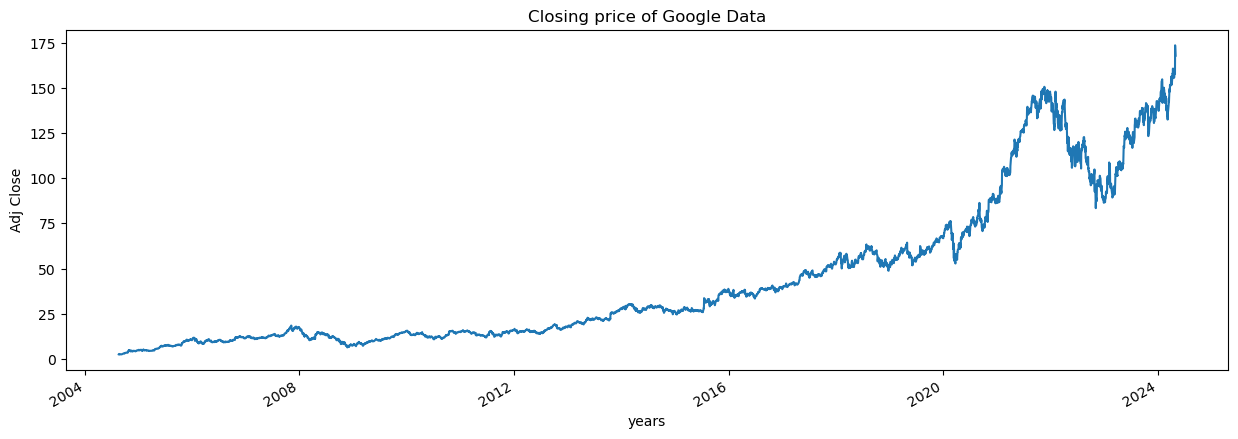

In [12]:
plt.figure(figsize = (15,5))
g_df['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel('Adj Close')
plt.title("Closing price of Google Data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel('years')
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google Data")
    

In [14]:
g_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

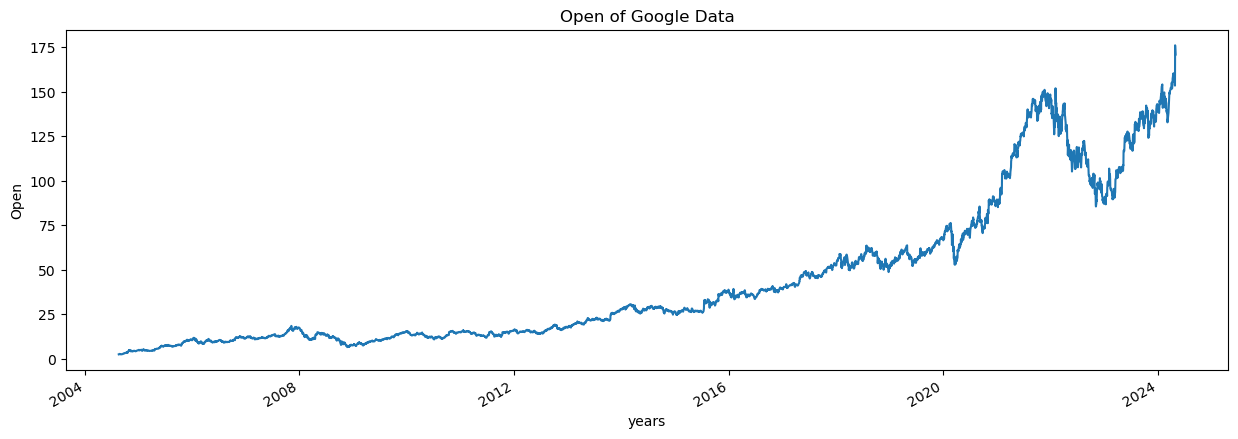

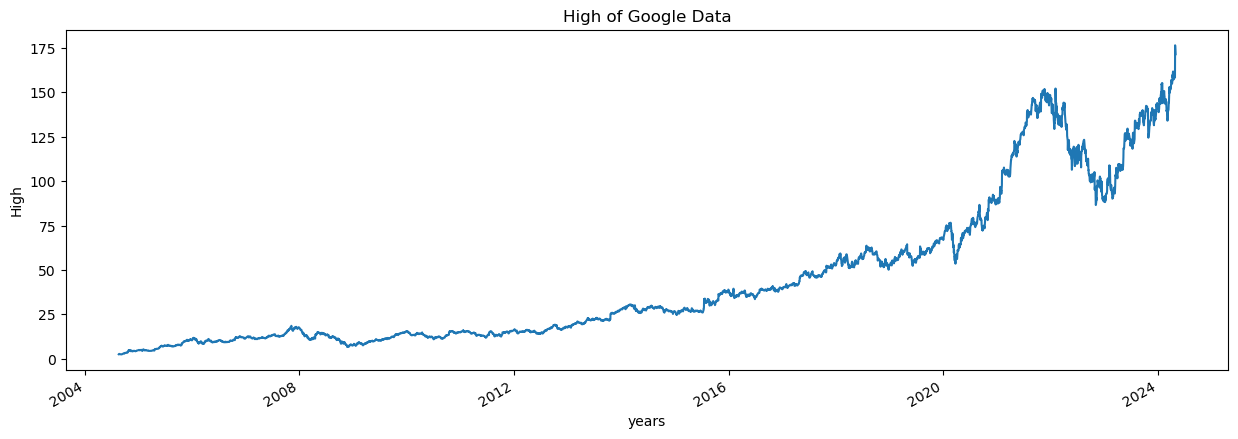

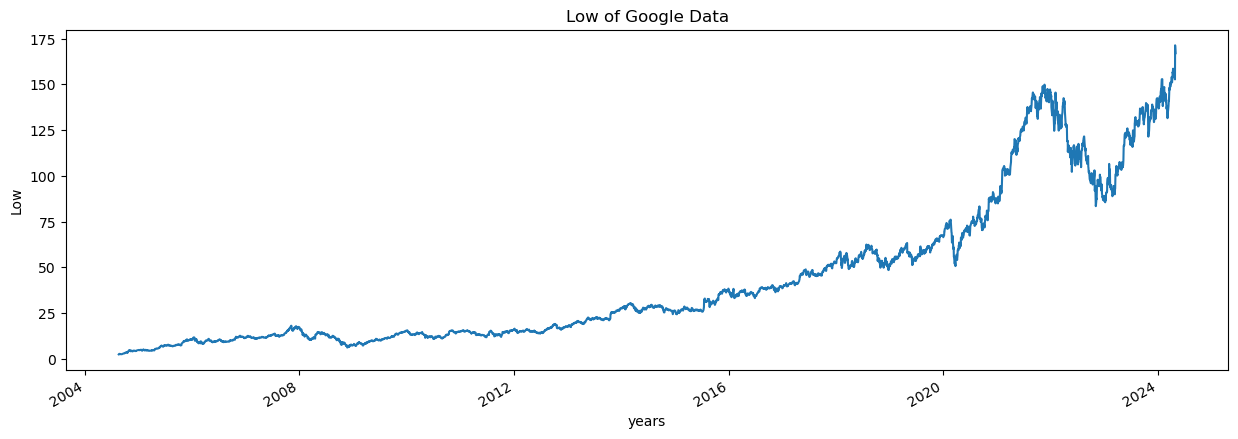

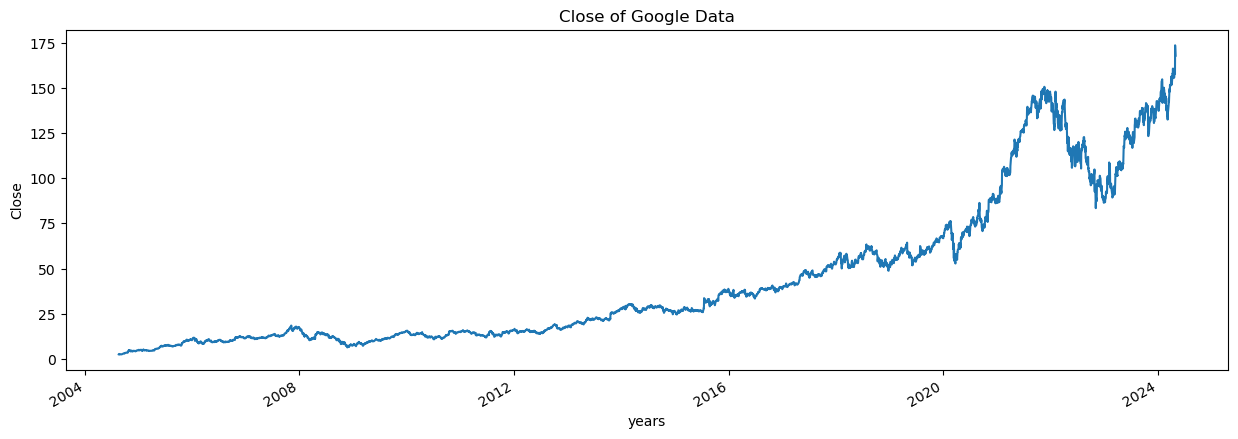

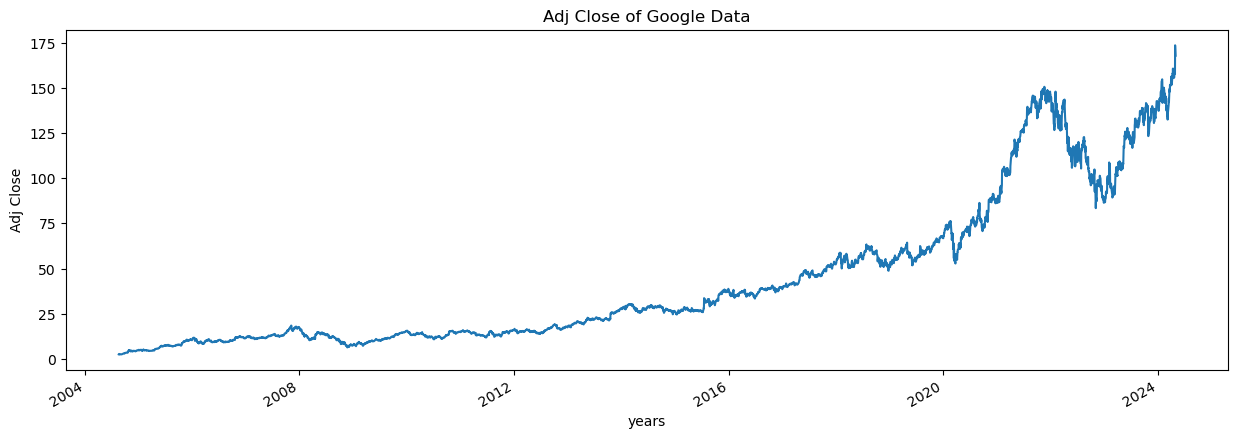

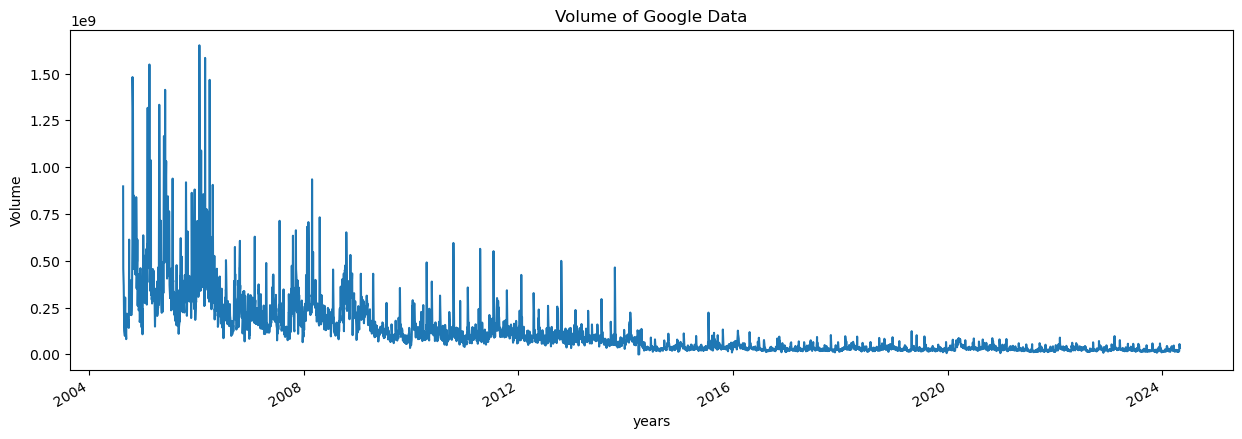

In [15]:
for column in g_df.columns:
    plot_graph((15,5), g_df[column], column)

#### Introducing the Moving Average [MA] concept

A moving average (MA) is a stock indicator commonly used in technical analysis to smooth out the price data by creating a constantly updated average price.

In [16]:
for i in range(2004,2025):
    print(i,list(g_df.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 82


As we can see, the common number of days where stocks move in a year is around 252 days.
Lets say we want to get the moving average for 250 days of the year.

In [17]:
 ## lets get the MA using the adjusted close price
g_df['MA_for_250_days'] = g_df['Adj Close'].rolling(250).mean()

In [18]:
g_df['MA_for_250_days'][0:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.034039
Name: MA_for_250_days, dtype: float64

As expected, there will be NaN values for days under 250 because we cannot get the average over 250 days movement if there number of days has been less than 250

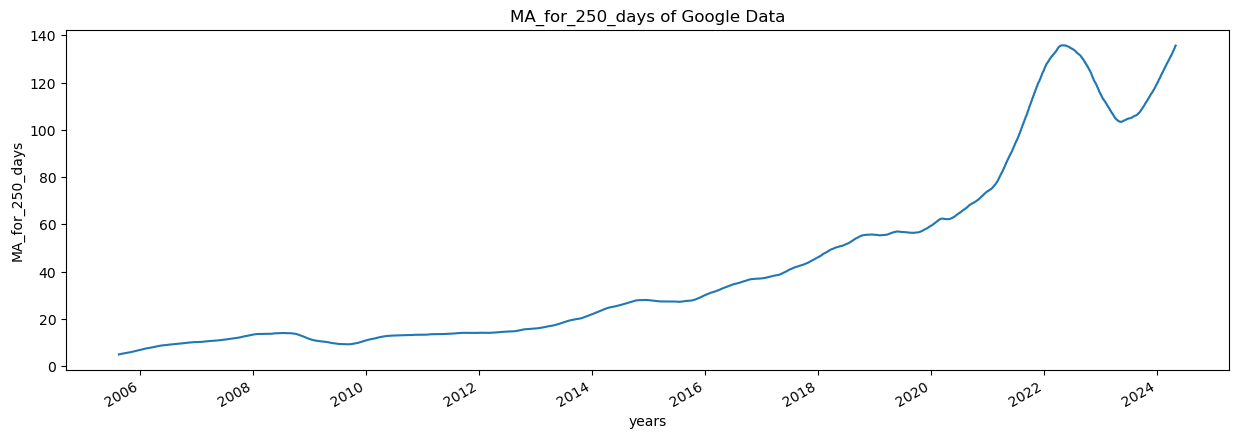

In [19]:
plot_graph((15,5), g_df['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

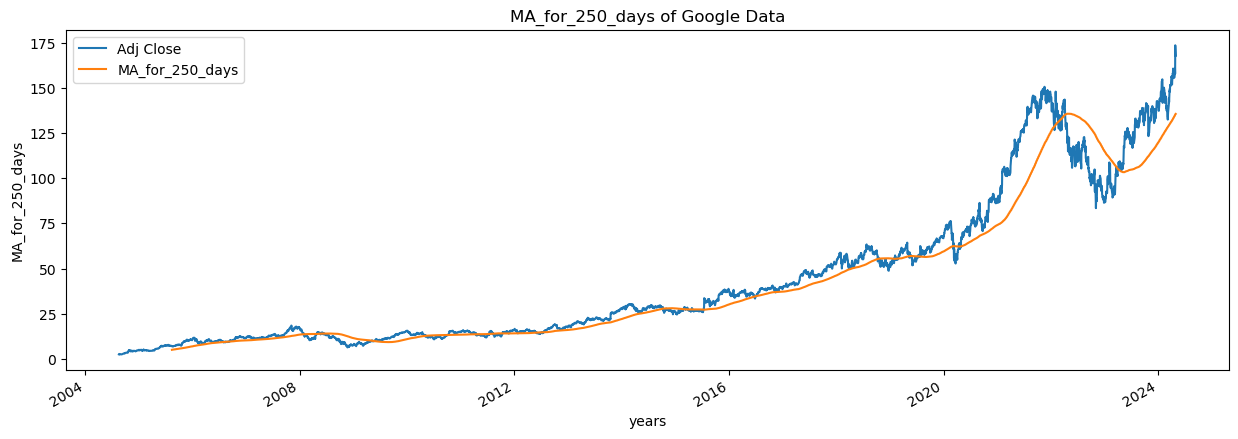

In [20]:
## lets compare the MA with the Adjusted Close column

plot_graph((15,5), g_df[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

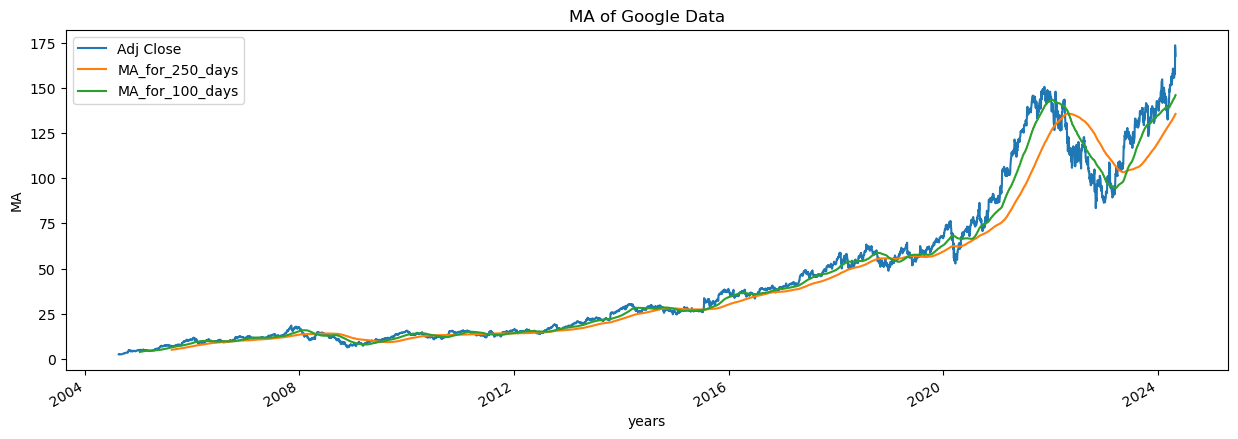

In [21]:
## If we want to decrease the number of days we want to look at for MA. For example lets take 100
g_df['MA_for_100_days'] = g_df['Adj Close'].rolling(100).mean()
plot_graph((15,5), g_df[['Adj Close','MA_for_250_days','MA_for_100_days']],'MA')


From the above, we can see that the MA for 100 days is closer than the MA for 250 days. Therefore if we wish to predict the close price, we can usee the MA FOR 100 DAYS

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Lets pre process our data so that we can prep it for modelling. 


#### Scale the data 
The scale of this data is too broard, so we can do some scaling in the range of 0,1

In [22]:
Adj_close_price = g_df[['Adj Close']]

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.80154176e-05],
       [1.20751854e-03],
       [1.36609420e-03],
       ...,
       [9.08060227e-01],
       [1.00000000e+00],
       [9.66179677e-01]])

In [24]:
len(scaled_data)

4957

In [25]:
## split the data set into x and y 
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)


In [26]:
x_data[0]

array([[4.80154176e-05],
       [1.20751854e-03],
       [1.36609420e-03],
       [7.07054110e-04],
       [8.71448216e-04],
       [1.14932293e-03],
       [8.93270874e-04],
       [2.90971091e-04],
       [3.43344077e-04],
       [3.49190376e-05],
       [2.18226577e-04],
       [0.00000000e+00],
       [2.28412341e-04],
       [3.33162491e-04],
       [3.34616406e-04],
       [7.73975999e-04],
       [1.08967340e-03],
       [1.67015610e-03],
       [1.74435035e-03],
       [2.03095134e-03],
       [2.54305683e-03],
       [2.81510892e-03],
       [2.59397451e-03],
       [2.67253190e-03],
       [3.02751705e-03],
       [2.88348612e-03],
       [2.65507935e-03],
       [3.90623624e-03],
       [4.52017709e-03],
       [4.30485974e-03],
       [4.73840228e-03],
       [5.09919752e-03],
       [5.58074851e-03],
       [5.39307783e-03],
       [5.65057962e-03],
       [5.48764082e-03],
       [5.12829811e-03],
       [5.43963237e-03],
       [5.94882307e-03],
       [6.10885265e-03],


In [27]:
int(len(x_data)*0.7)

3399

In [28]:
4957 - 100 - int(len(x_data)*0.7)

1458

In [29]:
## train_test split using 70 percent for training data

splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3399, 100, 1)
(3399, 1)
(1458, 100, 1)
(1458, 1)


 <a id="five"></a>
## 5. Modelling
<a href=#cont>Back to Table of Contents</a>

In [31]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras


In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [33]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\molat\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - loss: 8.6146e-05
Epoch 2/2
3399/3399 ━━━━━━━━━━━━━━━━━━━━ 109s 32ms/step - loss: 4.1721e-05


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

 <a id="six"></a>
## 6. Predictions
<a href=#cont>Back to Table of Contents</a>

In [38]:
preds = model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [39]:
preds

array([[0.3290674 ],
       [0.33235598],
       [0.3328846 ],
       ...,
       [0.88306427],
       [0.8760579 ],
       [0.9192217 ]], dtype=float32)

In [40]:
y_test

array([[0.33265416],
       [0.33120555],
       [0.33556887],
       ...,
       [0.90806023],
       [1.        ],
       [0.96617968]])

 <a id="seven"></a>
## 7. Model Performance
<a href=#cont>Back to Table of Contents</a>

In [42]:
rmse = np.sqrt(np.mean( (preds - y_test)**2))
rmse

0.019474726223108633

In [44]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': y_test.reshape(-1),
    'predictions': preds.reshape(-1)
 } ,
    index = g_df.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-07-13,0.332654,0.329067
2018-07-16,0.331206,0.332356
2018-07-17,0.335569,0.332885
2018-07-18,0.334716,0.334784
2018-07-19,0.332111,0.335411


<Figure size 640x480 with 0 Axes>

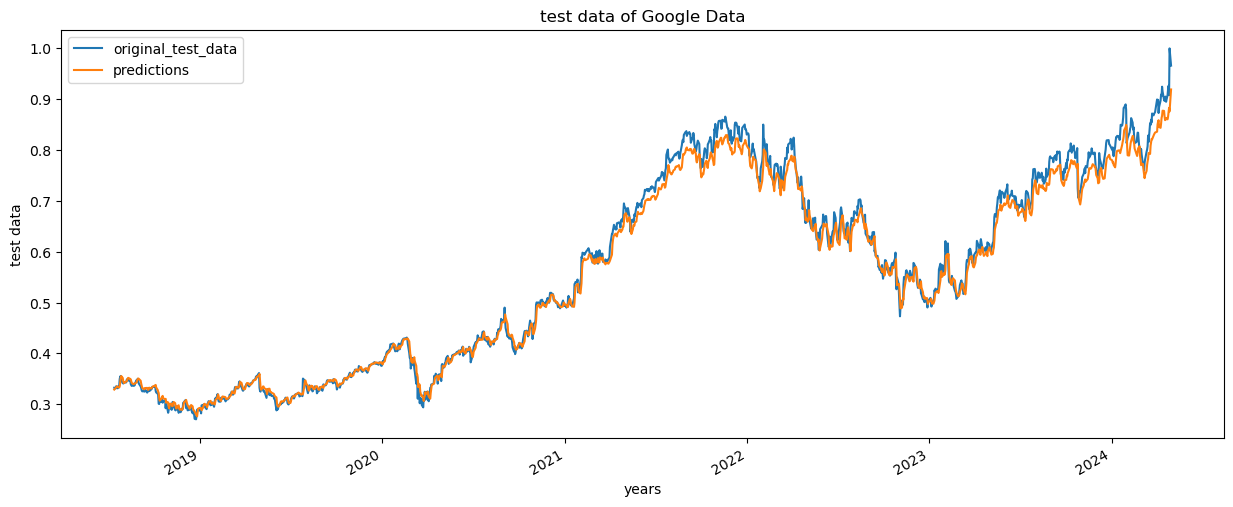

In [45]:
plot_graph((15,6), ploting_data, 'test data')

# Save your model

In [46]:
model.save("Google_stock_price_model.keras")